<img src='https://www.udacity.com/blog/wp-content/uploads/2019/03/480-white.png' width="300" height="150">
<h2><center>Analysis Of Chinook DataBase Using SQL. <br><br>
This is 1st Project in Udacity Advanced Nano-Degree Program.</center></h2>
<h3>Created By: Nabil Mostafa</h3>
<h3>Date: 06/09/2022</h3>

### This Project covers the analysis of Chinook Music DataBase, and answering some question, and creating some visuals to better understand the data.

#### First we import some necessary libraries.

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
%matplotlib inline

#### Then we create some functions to in the analysis process.

In [2]:
def query_func(q_statment):
    """
    query_func function is for getting the data in a certain query
    :param q_statment: the SQL Query that we want.
    :return: a DataFrame with the query results
    """
    conn = sqlite3.connect('chinook.db')
    c = conn.cursor()
    query = c.execute(q_statment).fetchall()
    query_df = pd.DataFrame(query)
    conn.close()
    return query_df

In [3]:
def plot_bars(x_values, y_values, plot_title, x_title, y_title):
    """
    plot_bars function is for plotting a bar plot
    :param x_values: a list of x_values
           y_values: a list of y_values
           plot_title: the title of the plot.
           x_title: the name of X axis.
           y_title: the name of Y axis.
    :return: none
    """
    plt.figure(figsize =(12, 8))
    color = sns.set_palette("pastel")
    fig = sns.barplot(x=x_values, y=y_values, palette=color, width = 0.6, data=y_values)
    fig.bar_label(fig.containers[0], fmt='%.2f')
    plt.xlabel(x_title, fontsize=16)
    plt.xticks(rotation=45)
    plt.ylabel(y_title, fontsize=16)
    plt.title(plot_title, fontsize=18, fontweight='bold')
    plt.show()

### Q1- What are the top 10 Countries with most sales?

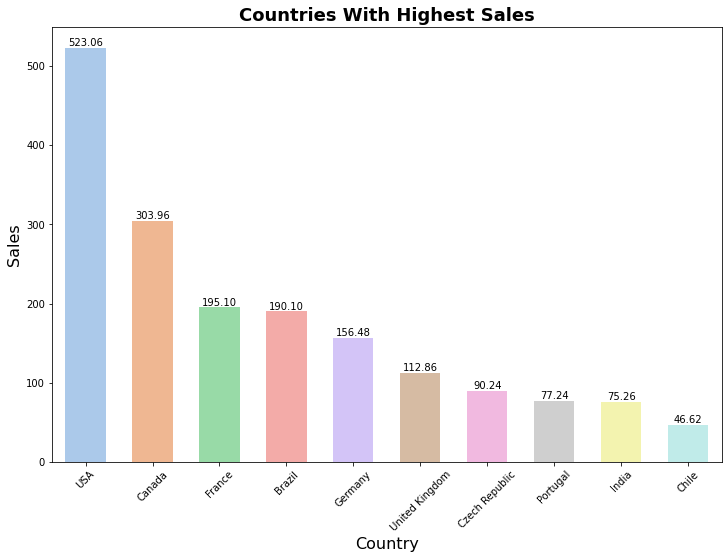

In [4]:
query = """
            SELECT BillingCountry, SUM(Total) AS Sales
            FROM Invoice
            GROUP BY 1
            ORDER BY 2 DESC
            LIMIT 10
        """
df = query_func(query)
plot_bars(df.iloc[:,0], df.iloc[:,1], 'Countries With Highest Sales', 'Country', 'Sales')

### Q2- What are the top Genres with most sales?

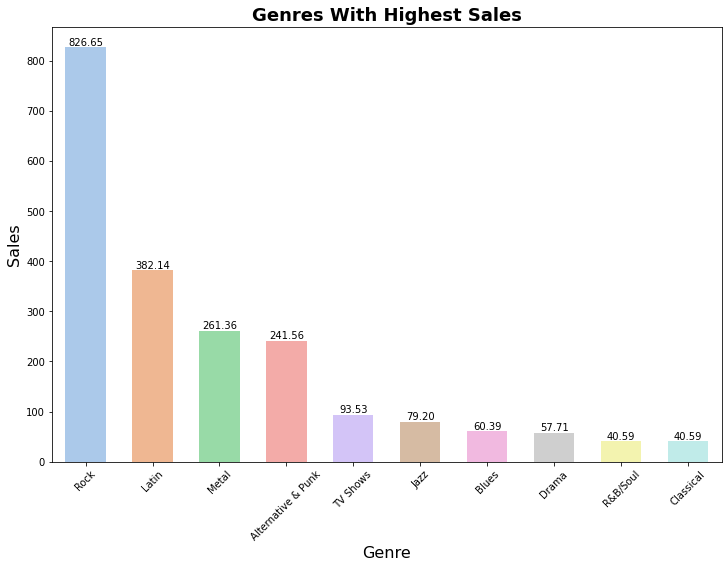

In [5]:
query = """
            SELECT g.Name AS genre, SUM(il.UnitPrice * il.Quantity) AS Sales
            FROM Invoice i
            JOIN InvoiceLine il
            ON i.InvoiceId = il.InvoiceId
            JOIN Track t
            ON il.TrackId = t.TrackId
            JOIN Genre g
            ON t.GenreId = g.GenreId
            GROUP BY 1
            ORDER BY 2 DESC
            LIMIT 10
        """
df = query_func(query)
plot_bars(df.iloc[:,0], df.iloc[:,1], 'Genres With Highest Sales', 'Genre', 'Sales')

### Q3- What are the top Genres with most songs?

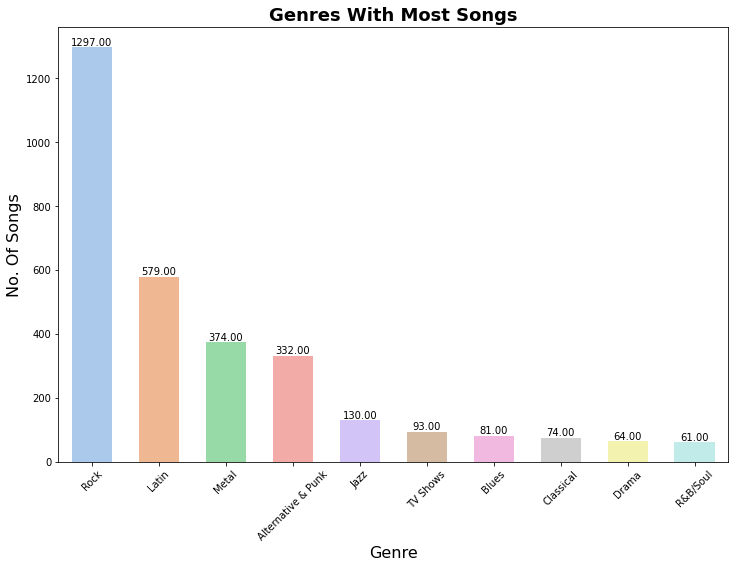

In [6]:
query = """
            SELECT g.Name AS genre, COUNT(TrackId) AS track_count
            FROM Genre g
            JOIN Track t
            ON g.GenreId = t.GenreId
            GROUP BY 1
            ORDER BY 2 DESC
            LIMIT 10
        """
df = query_func(query)
plot_bars(df.iloc[:,0], df.iloc[:,1], 'Genres With Most Songs', 'Genre', 'No. Of Songs')

### Q4- What are the top Genres in each Country and their sales?

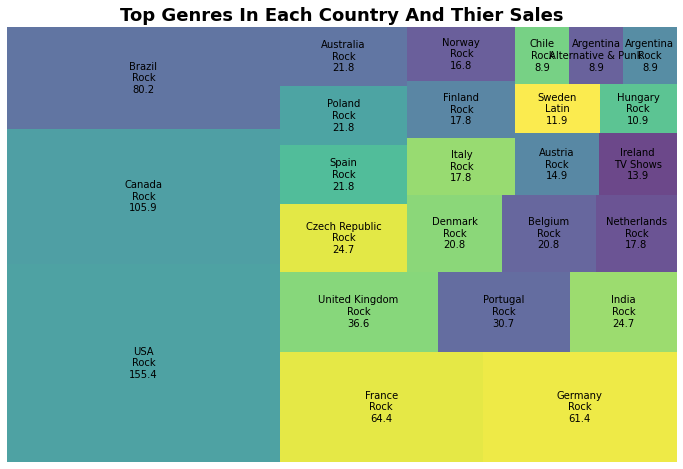

In [7]:
query = """
            WITH t1 AS (SELECT BillingCountry, MAX(Sales) AS TotalSales
                        FROM (SELECT i.BillingCountry, g.Name AS genre, SUM(il.UnitPrice * il.Quantity) AS Sales
                              FROM Invoice i
                              JOIN InvoiceLine il
                              ON i.InvoiceId = il.InvoiceId
                              JOIN Track t
                              ON il.TrackId = t.TrackId
                              JOIN Genre g
                              ON t.GenreId = g.GenreId
                              GROUP BY 1, 2)
                        GROUP BY 1
                        ORDER BY 2 DESC),
                 t2 AS (SELECT i.BillingCountry, g.Name AS genre, SUM(il.UnitPrice * il.Quantity) AS Sales
                        FROM Invoice i
                        JOIN InvoiceLine il
                        ON i.InvoiceId = il.InvoiceId
                        JOIN Track t
                        ON il.TrackId = t.TrackId
                        JOIN Genre g
                        ON t.GenreId = g.GenreId
                        GROUP BY 1, 2)
            SELECT t1.BillingCountry, t2.genre, t1.TotalSales
            FROM t1
            JOIN t2
            ON t1.BillingCountry = t2.BillingCountry AND t1.TotalSales = t2.Sales
            ORDER BY 3 DESC
        """
df = query_func(query)
i = 0
labels = []
color = sns.set_palette("pastel")
while i < 25:
    labels.append('{}\n{}\n{:.1f}'.format(df.iloc[i,0],df.iloc[i,1],df.iloc[i,2]))
    i += 1
plt.figure(figsize =(12, 8))
squarify.plot(sizes=df.iloc[:,2], label=labels, alpha=.8, color=color)
plt.title('Top Genres In Each Country And Thier Sales', fontsize=18, fontweight='bold')
plt.axis('off')
plt.show()

### Q5- Who are the top Artists with most sales?

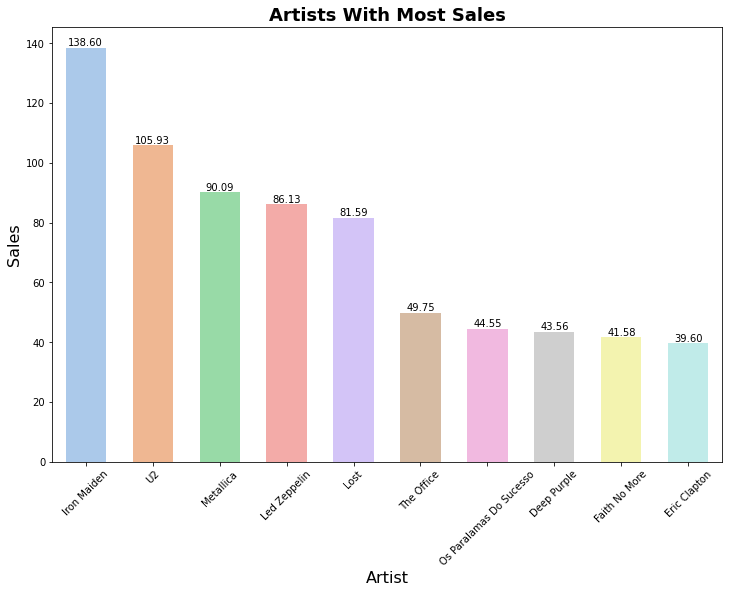

In [8]:
query = """
            SELECT a.Name AS Artist_name, SUM(il.UnitPrice * il.Quantity) AS Sales
            FROM InvoiceLine il
            JOIN Track t
            ON il.TrackId = t.TrackId
            JOIN Album al
            ON t.AlbumId = al.AlbumId
            JOIN Artist a
            ON al.ArtistId = a.ArtistId
            GROUP BY 1
            ORDER BY 2 DESC
            LIMIT 10
        """
df = query_func(query)
plot_bars(df.iloc[:,0], df.iloc[:,1], 'Artists With Most Sales', 'Artist', 'Sales')

### Q6- Who are the top Artists with most songs?

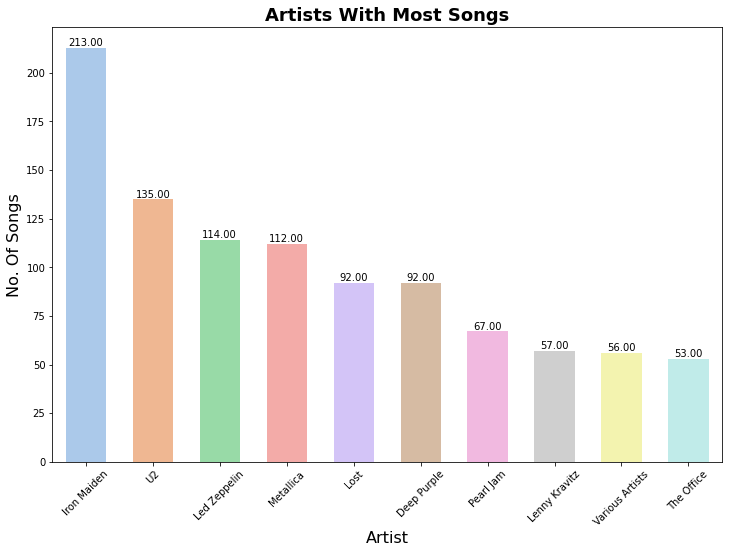

In [9]:
query = """
            SELECT a.Name AS Artist_name, COUNT(t.TrackId) AS track_count
            FROM Artist a
            JOIN Album al
            ON a.ArtistId = al.ArtistId
            JOIN Track t
            ON al.AlbumId = t.AlbumId
            GROUP BY 1
            ORDER BY 2 DESC
            LIMIT 10
        """
df = query_func(query)
plot_bars(df.iloc[:,0], df.iloc[:,1], 'Artists With Most Songs', 'Artist', 'No. Of Songs')

### Q7- Who are the top Clients with most sales?

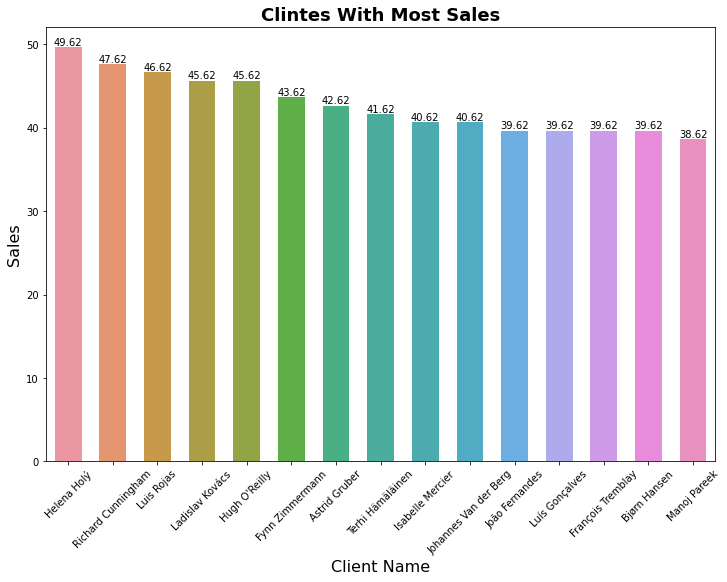

In [10]:
query = """
            WITH t1 AS (SELECT BillingCountry, MAX(Total_) AS TotalSpent 
                        FROM (SELECT i.BillingCountry, c.FirstName, c.LastName, SUM(i.Total) Total_
                              FROM Invoice i
                              JOIN Customer c
                              ON i.CustomerId = c.CustomerId
                              GROUP BY 1, 2, 3)
                        GROUP BY 1),
                 t2 AS (SELECT i.BillingCountry, c.FirstName, c.LastName, SUM(i.Total) Total_
                        FROM Invoice i
                        JOIN Customer c
                        ON i.CustomerId = c.CustomerId
                        GROUP BY 1, 2, 3)
            SELECT t2.FirstName || ' ' || t2.LastName AS FullName , t1.TotalSpent
            FROM t2
            JOIN t1
            ON t2.BillingCountry = t1.BillingCountry 
            AND t2.total_ = t1.TotalSpent
            ORDER BY 2 DESC
            LIMIT 15
        """
df = query_func(query)
plot_bars(df.iloc[:,0], df.iloc[:,1], 'Clintes With Most Sales', 'Client Name', 'Sales')